# Pipeline configuration

In [2]:
confi_dict = {

    'general':{
        'root_dir':r"C:\Users\na-ch\Desktop\estudio\Master_Big_Data\03_TFM\02_Code\dataset_test",
        'dataset_dir': "CASIA_IrisV1"
    },

    '1_tratarDataset':{
        'show_first' : False
    },

    '1.1_dataAugmentation':{
        'gaussianNoise' : False,
        'stdGN': [5, 10, 15, 20],
        'skipFiles': 1, 
        ''' 
        1 means that you are skiping 1 for the noise augmentation, 
        2 skiping 2 and so on. If you don't want to skip files set it as 0
        '''
        'afinTransformation': False
    },

    '2.1_segmentation':{
        'redNeuronal' : "Iris_unet_d5.h5", 
        'numSamplesGenerator' : 3, 
        'verImagenV1' : False
    },

    '3.1_extraction': {
        
    }

}

# 1: Tratar el dataset CASIA



## 1 tratar_dataset_casia()

In [3]:
def tratar_dataset_casia(confi):
    
    print("Función 1, tratar_dataset_casia()")
    
    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    try:
        import shutil
    except:
        !pip install shutil
        import shutil
    try:
         import imageio
    except:
        !pip install imageio
        import imageio
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(confi['general']['root_dir'])
    
    def copy_all_samples(path_samples, destination_directory):
        '''
        Copia todas las muestras del dataset de CASIA a un único directorio.
        '''
        if not os.path.exists(path_samples):
            print("->El directorio indicado como input no existe")
        elif not os.path.exists(destination_directory):
            ''' 
            Comprobamos que el directorio del output no existe
            '''
            os.mkdir(destination_directory) # Creamos un nuevo directorio 
            for root, dirs, files in os.walk(path_samples):
                for file in files:
                    path_file = os.path.join(root,file)
                    shutil.copy2(path_file,destination_directory)   
            print("-> Muestras copiadas satisfactoriamente.")
        elif len(os.listdir(destination_directory)) < 1:
            ''' 
            Comprobamos que el directorio del output no está vacío
            '''
            for root, dirs, files in os.walk(path_samples):
                for file in files:
                    path_file = os.path.join(root,file)
                    shutil.copy2(path_file,destination_directory)   
            print("-> Muestras copiadas satisfactoriamente.")
        else:
            print("-> Muestras previamente copiadas.")

    confi['general']['dataset_unif_dir'] = confi['general']['dataset_dir']+"_unif"

    copy_all_samples(confi['general']['dataset_dir'], confi['general']['dataset_unif_dir'])

    if confi['1_tratarDataset']['show_first']:
        ''' 
        Si en la configuración show_first es True, se mostrará el primer elemento del nuevo directorio.
        '''
        path_img = confi['general']['dataset_unif_dir'] + os.sep + os.listdir(confi['general']['dataset_unif_dir'])[0]
        img = imageio.imread(path_img)
        plt.title("Primer elemento de " + confi['general']['dataset_unif_dir'])
        plt.imshow(img)
    
    ''' 
    Pasando el diccionario con la configuración a la siguiente función
    '''
    return confi


## 1.1 data_augmentation()

In [4]:
def data_augmentation(confi):

    print("Función 1.1, data_augmentation()")
    
    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    try:
        import imageio
    except:
        !pip install imageio
        import imageio
    try:
        import skimage.io as io
    except:
        !pip install scikit-image
        import skimage.io as io
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    try:
        from tensorflow.keras.layers import GaussianNoise
    except:
        !pip install tensorflow
        from tensorflow.keras.layers import GaussianNoise
    try:
        import numpy as np
    except:
        !pip install numpy
        import numpy as np
    import random

    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(confi['general']['root_dir'])
    
    ''' 
    Comprobamos si el ruido gaussiano ha sido establecido como True en la configuración
    '''

    if confi['1.1_dataAugmentation']['gaussianNoise']:

        ''' 
        Comprobamos si el ruido gaussiano se ha aplicado anteriormente, si es así, el primer elemento del directorio debería de tener el sufijo _augmentation
        '''
        if "_augment" in os.listdir(confi['general']['dataset_unif_dir'])[1]:
            print("->El ruido gaussiano ya se ha ejecutado con anterioridad")
        else:     
            ''' 
            Desde el directorio unificado creamos nuevas imágenes utilizando el ruido gaussiano como data augmentation.
            Añadimos un contador para que el augmentation sea de 1 cada dos imágenes.
            '''
            i = 0
            for filename in os.listdir(confi['general']['dataset_unif_dir']):
                if confi['1.1_dataAugmentation']['skipFiles'] == 0:
                    path = confi['general']['dataset_unif_dir'] + os.sep + filename
                    image = imageio.imread(path)/255
                    std_rdm = random.choice(confi['1.1_dataAugmentation']['stdGN'])
                    gaussean_function = GaussianNoise(std_rdm/100)
                    noisey = gaussean_function(image.astype(np.float32),training=True)
                    name = path[:-4] + '_augment.bmp'
                    plt.imsave(name, noisey, cmap='gray')
                elif i < confi['1.1_dataAugmentation']['skipFiles']:
                    path = confi['general']['dataset_unif_dir'] + os.sep + filename
                    image = imageio.imread(path)/255
                    std_rdm = random.choice(confi['1.1_dataAugmentation']['stdGN'])
                    gaussean_function = GaussianNoise(std_rdm/100)
                    noisey = gaussean_function(image.astype(np.float32),training=True)
                    name = path[:-4] + '_augment.bmp'
                    io.imsave(name, noisey)
                    i += 1
                else:
                    i = 0
            print("->Data augmentation 'ruido gausseano' ejecutado correctamente")
    else:
        print("->Saltando el ruido gausseano en data augmentation")

    ''' 
    Pasando el diccionario con la configuración a la siguiente función
    '''
    return confi

# 2 Red U-Net v2

## 2.1 segmentation()

In [5]:
def segmentation(confi):

    print("Función 2.1, segmentation()")

    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    try:
        import cv2
    except:
        import cv2
    try:
        import shutil
    except:
        !pip install shutil
        import shutil
    try:
         import imageio
    except:
        !pip install imageio
        import imageio
    try:
        import skimage.transform as trans
        from skimage.io import imshow
        import skimage.io as io
    except:
        !pip install scikit-image
        import skimage.transform as trans
        from skimage.io import imshow
        import skimage.io as io
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    try:
        from keras.models import load_model
    except:
        !pip install tensorflow 
        from keras.models import load_model
    try:
        import numpy as np
    except:
        !pip install numpy
        import numpy as np
    try:
        from PIL import Image
    except:
        !pip install Pillow
        from PIL import Image
    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(confi['general']['root_dir'])

    ''' 
    Creamos un generador con un número n de imágenes para pasarselas al modelo en el predict
    *Recordemos que este modelo ya está entrenado para la segmentación del ojo
    '''
    def testGenerator(directory, target_size = (320,320)):
        '''
        Genera las muestras que se le pasarán al método predecir de la red preentrenada.
        
        Parámetros:
        directory -- directorio dónde se encuentran las muestras a generar
        num_image -- número máximo de imágenes que queremos generar
        target_size -- shape de de la muestra
        flag_multi_class -- (de momento mantener pero no nos es útil)
        '''
        for file in os.listdir(directory):
            path_file = os.path.join(directory,file)
            img = imageio.imread(path_file)
            img = img / 255
            img = trans.resize(img,target_size)
            img = np.reshape(img, img.shape+(1,))
            img = np.reshape(img, (1,) + img.shape)
            yield img
    
    def get_samples_names(directory):
        '''
        Devuelve los nombres de las muestras (los que se encuentran en los directorios hoja)
        
        Parámetros:
        directory -- directorio de cuyos subdirectorios hoja se quiere el nombre 
        '''
        names = []
        for file in os.listdir(directory):
            names.append(str(file))
                
        return names

    def saveResult(save_path, name_path, npyfile):
        '''
        Guarda los imágenes segmentadas resultado de la red preentrenada
        
        Parámetros:
        save_path -- ruta en la que se guardarán las muestras segmentadas
        name_path -- directorio del que cogeremos los nombres de las muestras
        npyfile -- resultado de la red preentrenada
        '''
        dim = (320, 280) # dimensioned de las muestras del dataset
        os.mkdir(save_path)
        names = get_samples_names(name_path)
        for i, item in enumerate(npyfile):
            img = item[:,:,0]
            img = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
            io.imsave(os.path.join(save_path,names[i]),img)    

    confi['general']['dataset_unif_seg_dir'] =  confi['general']['dataset_unif_dir']  + "_seg"
    if not os.path.exists(confi['general']['dataset_unif_seg_dir']):
        ''' 
        Cargamos el modelo de segmentación
        '''
        model = load_model(confi['2.1_segmentation']['redNeuronal'])
        print("->Modelo cargado")
        testGene = testGenerator(confi['general']['dataset_unif_dir'])
        Unet_results = model.predict(testGene, verbose=1) 
        saveResult(confi['general']['dataset_unif_seg_dir'], confi['general']['dataset_unif_dir'], Unet_results)
        print("->Segmentaciones guardadas")
    else:
        print("->Segmentaciones previamente guardadas")

    if confi['2.1_segmentation']['verImagenV1']:
        sample = "001_1_1.bmp"
        path_img = confi['general']['dataset_unif_dir'] + os.sep + sample
        path_back = confi['general']['dataset_unif_seg_dir'] + os.sep + sample
        image = Image.open(path_img)
        background = Image.open(path_back)
        background.paste(image, (0, 0), image)
        plt.imshow(background, cmap='gray');
    
    confi['general']['dataset_unif_segv2_dir'] = confi['general']['dataset_unif_seg_dir'] + "v2"
    confi['general']['dataset_unif_segv2_edg_dir'] = confi['general']['dataset_unif_segv2_dir'] + "_edg"

    segv2_dir = False
    edge_dir = False

    for file in os.listdir(confi['general']['dataset_unif_seg_dir']):
        path_file = os.path.join(confi['general']['dataset_unif_seg_dir'],file)
        img = cv2.imread(path_file)
        blur= cv2.GaussianBlur(img,(17,17),0)
        (thresh, binarized) = cv2.threshold(blur, 70, 255, cv2.THRESH_BINARY) # se binariza nuevamente
        edges = cv2.Canny(binarized, 10, 255)

        # creamos un nuevo directorio para guardar las muestras segmentadas con mayor calidad
        if not os.path.exists(confi['general']['dataset_unif_segv2_dir']):
            os.mkdir(confi['general']['dataset_unif_segv2_dir'])
            cv2.imwrite(confi['general']['dataset_unif_segv2_dir'] + os.sep + file, binarized)
            segv2_dir = True
        elif segv2_dir:
            cv2.imwrite(confi['general']['dataset_unif_segv2_dir'] + os.sep + file, binarized)
        else:
            print("->La segmentación v2 ya había sido creada")
            break 

        # creamos un nuevo directorio para guardar las muestras con los bordes detectados
        if not os.path.exists(confi['general']['dataset_unif_segv2_edg_dir']):
            os.mkdir(confi['general']['dataset_unif_segv2_edg_dir'])
            cv2.imwrite(confi['general']['dataset_unif_segv2_edg_dir'] + os.sep + file, edges)# guardamos muestra
            edge_dir = True
        elif edge_dir:
            cv2.imwrite(confi['general']['dataset_unif_segv2_edg_dir'] + os.sep + file, edges)# guardamos muestra
        else:
            print("->La edge ya había sido creada")
            break 
    
    print("->Segmentaciones V2 guardadas")
    print("->Edge guardadas")

    return confi

## 2.2 normalization()

In [6]:
def normalization(confi):

    print("Función 2.2, normalization()")

    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    try:
        import cv2
    except:
        import cv2
    try:
        from skimage.transform import (hough_circle, hough_circle_peaks)
        from skimage.io import imshow
    except:
        !pip install scikit-image
        from skimage.transform import (hough_circle, hough_circle_peaks)
        from skimage.io import imshow
    try:
         import imageio
    except:
        !pip install imageio
        import imageio
    try:
        import numpy as np
    except:
        !pip install numpy
        import numpy as np
    try:
        import matplotlib.pyplot as plt
    except:
        !pip install matplotlib
        import matplotlib.pyplot as plt
    try:
        import pandas as pd
    except:
        !pip install pandas
        import pandas as pd
    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(confi['general']['root_dir'])
    ''' 
    Creando funciones
    '''

    def draw_circles(img, cx, cy, radii):
        '''
        A partir de los centros y el radio detectados dibuja el iris sobre la imagen que se le
        pasa como parámetro.
        '''
        image = img.copy()
        pupil = cv2.circle(image,(cx[0],cy[0]), radii[0]+3, (255, 0, 0), 2)
        iris = cv2.circle(image,(cx[1],cy[1]), radii[1], (255, 0, 0), 2)
        return image
    
    def get_circles(borde, sample):
        path_sample = "CASIA_IrisV1_unif" + os.sep + sample
        path_edged = "CASIA_IrisV1_unif_segv2_edg" + os.sep + sample
        sample_ = imageio.imread(path_sample)
        gray_img = imageio.imread(path_edged)
        
        hough_radii = np.arange(20, 80) # pupila por defecto
        if borde == "iris":
            hough_radii = np.arange(90, 160) # rango del iris
        
        hough_res = hough_circle(gray_img, hough_radii)
        accums, cx, cy, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=1) 

        
        return [cx[0], cy[0], radii[0]]

    confi['general']['dataset_unif_segv2_edg_norm_dir'] = confi['general']['dataset_unif_segv2_edg_dir'] + "_norm"
    
    if not os.path.exists(confi['general']['dataset_unif_segv2_edg_norm_dir']):
        os.mkdir(confi['general']['dataset_unif_segv2_edg_norm_dir'])
    
        image_files = []
        new_dir = 'CASIA_IrisV1_unif_segv2_edg'

        for root, dirs, files in os.walk(new_dir):
            for file in files:
                if file.endswith(".bmp"):
                    image_files.append(file)
                    
        # cogemos las clases a las que pertenece cada .bmp
        classes = []           
        for name in image_files:
            classes.append(name.split('_', 1)[0])
        
        x_pupil, y_pupil, r_pupil =[], [], []
        x_iris, y_iris, r_iris =[],[],[]

        for file in os.listdir(confi['general']['dataset_unif_segv2_dir']):

            path_sample = "CASIA_IrisV1_unif" + os.sep + file
            sample_image = imageio.imread(path_sample)
            boundaries,centers, pupil_centers = [],[],[]
            pupil_coord = get_circles("pupil",file)
            iris_coord = get_circles("iris",file)
            cx, cy, radius = list(zip(pupil_coord, iris_coord))
            draw = draw_circles(sample_image,cx,cy,radius)

            boundaries.append(draw)
            data = {'pupil':pupil_coord,
                    'iris':iris_coord}
            centers.append(data)
            pupil_centers.append(pupil_coord)

            target = [img for img in boundaries]
            normalized=[]
            cent=0
                
            for img in target:
                #load pupil centers and radius of inner circles
                print(pupil_centers[0][0])
                center_x = pupil_centers[cent][0]
                center_y = pupil_centers[cent][1]
                radius_pupil=int(pupil_centers[cent][2])

                iris_radius = 53 # width of space between inner and outer boundary

                #define equally spaced interval to iterate over
                nsamples = 360
                samples = np.linspace(0,2*np.pi, nsamples)[:-1]
                polar = np.zeros((iris_radius, nsamples))
                for r in range(iris_radius):
                    for theta in samples:
                        #get x and y for values on inner boundary
                        x = (r+radius_pupil)*np.cos(theta)+center_x
                        y = (r+radius_pupil)*np.sin(theta)+center_y
                        x=int(x)
                        y=int(y)
                        try:
                            #convert coordinates
                            polar[r][int((theta*nsamples)/(2*np.pi))] = img[y][x]
                        except IndexError: #ignores values which lie out of bounds
                            pass
                        continue
                res = cv2.resize(polar,(512,64))
                normalized.append(res)
                cent+=1

            h,w = normalized[0].shape # height, width

            roi = normalized[0][10:h, 0:int(512/2)]
            roi = roi.astype(np.uint8) 
            roi_enhanced = cv2.equalizeHist(roi)
            cv2.imwrite(confi['general']['dataset_unif_segv2_edg_norm_dir'] + os.sep + file, roi_enhanced)

            for i in centers:
                x_pupil.append(i['pupil'][0])
                y_pupil.append(i['pupil'][1])
                r_pupil.append(i['pupil'][2])
                x_iris.append(i['iris'][0])
                y_iris.append(i['iris'][1])
                r_iris.append(i['iris'][2])

        data = {'image': image_files,
        'pupil x_center':x_pupil,
        'pupil y_center':y_pupil,
        'pupil radius': r_pupil,
        'iris x_center': x_iris,
        'iris y_center': y_iris,
        'iris radius':r_iris,
        'class': classes}
        
        ################################# arrays must be the same lenght
        df = pd.DataFrame(data)[['image','pupil x_center','pupil y_center','pupil radius','iris x_center', 'iris y_center','iris radius',"class"]] 

        df.to_csv("iris_data.csv")
    
    else:
        print("->Normalización realizada con anterioridad")

    return confi

        

# Feature extraction

## extraction()

In [7]:
def extraction(confi):
    
    print("Función 3.1, extraction()")

    ''' 
    Importando librerías
    '''
    try:
        import os
    except:
        !pip install os
        import os
    try:
        import cv2
    except:
        import cv2

    from keras.applications.vgg16 import VGG16
    from keras.applications.inception_v3 import InceptionV3
    from keras.applications.resnet_v2 import ResNet50V2

    from keras.applications.vgg16 import preprocess_input as vgg16_preprocessor
    from keras.applications.inception_v3 import preprocess_input as inception_v3_preprocessor
    from keras.applications.resnet_v2 import preprocess_input as resnet_v2_preprocessor


    from keras.models import clone_model
    from keras.models import Model
    from keras.preprocessing import image


    from IPython.display import clear_output
    from tqdm import tqdm

    import numpy as np

    import matplotlib.pyplot as plt

    import pandas as pd

    
    ''' 
    Estableciendo la root de la función
    '''
    os.chdir(confi['general']['root_dir'])
    ''' 
    Creando funciones
    '''
    models_dict = {}
    vgg16_dict, inception_v3_dict, resnet50_dict = {} ,{} ,{}

    # if there a way to check if they are already load??
    #
    #
    #
    print("Loading VGG16")
    model = VGG16(weights='imagenet')
    model = Model(model.input, model.layers[-2].output) # output_shape de la penúltima capa(fully-connected) -> (,4096)
    vgg16_dict["model"] = clone_model(model)
    vgg16_dict["preprocesor"] = vgg16_preprocessor
    vgg16_dict["target_size"] = model.input_shape[1], model.input_shape[2]# default vgg16 input (224,224)


    print("Loading Inception v3")
    model = InceptionV3(weights='imagenet')
    model = Model(model.input, model.layers[-2].output)# output_shape de la penúltima capa(pooling) -> (,2048)
    inception_v3_dict["model"] = clone_model(model)
    inception_v3_dict["preprocesor"] = inception_v3_preprocessor
    inception_v3_dict["target_size"] = model.input_shape[1],model.input_shape[2] # default inceptionv3 input (299,299)


    print("Loading ResNet 50")
    model = ResNet50V2(weights='imagenet')
    model = Model(model.input, model.layers[-2].output)# output_shape de la penúltima capa(pooling) -> (,2048)
    resnet50_dict["model"] = clone_model(model)
    resnet50_dict["preprocesor"] = resnet_v2_preprocessor
    resnet50_dict["target_size"] = model.input_shape[1],model.input_shape[2]# default ResNet input (224,224)


    # diccionarios de los 3 modelos, clave -> nombre, valor -> otro diccionario
    models_dict["VGG16"] = vgg16_dict
    models_dict["InceptionV3"] = inception_v3_dict
    models_dict["ResNet50"] = resnet50_dict


    confi['3.1_extraction']['models_dict'] = models_dict

    clear_output()

    ''' 
    Extract features: extracción de features pasandole una imágen y el modelo a utilizar
    '''
    def extract_features(image_path, model_name):
        '''
        model_name extaerá los features de la imagen que se le pase como parámetro.
        '''
        model_dict = models_dict[model_name]
        ####
        model = model_dict["model"]
        preprocessor = model_dict["preprocesor"]
        target_size = model_dict["target_size"]
        # se carga la imagen y después se ajusta al input shape del modelo
        img = cv2.resize(cv2.imread(image_path),target_size)

        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocessor(img_data)
        
        # extracción de features
        features = model.predict(img_data)
        return features[0]

    def get_paths(directory):
        '''
        Devuelve la ruta relativa de las muestras .bmp
        '''
        paths = []
        for root, dirs, files in os.walk(directory):
            for file in files:
                if file.endswith(".bmp"):
                    paths.append(os.path.join(root, file))
        return paths

    # cargamos csv con los datos de las muestras
    df = pd.read_csv("iris_data.csv", dtype={'class': str}, index_col=0) # quitamos columna unnamed

    # cambiamos nombre de columnas para evitar conflictos con palabras reservadas de Pytho
    df.rename(columns={'image':'Image','class':'Clase'}, inplace=True)

    def register_to_deepfeatures(register):
        """
        Compute all CNN features    
        
        Parameters
        ----------
        register : Series
            Serie containing metadata of the image
    
        Returns
        -------
        results : Series 
            A Pandas Serie contanining all of the features

        """
        img_name = register.Image # nombre de la muestra e.g: Rafael_1.bmp
        clase = register.Clase # clase e.g Rafael

        img_dir = os.path.join("CASIA_IrisV1_unif_segv2_edg_norm", img_name)

        basic_values = pd.Series([img_name,clase],["Name","Class"])

        all_features = []
        all_names = []
        models = models_dict.keys() # 3 modelos
        
        for model in models:
            features = extract_features(img_dir, model)
            names = [f"{model}_{i}" for i in range(len(features))]
            all_features+=list(features)
            all_names+= names
            
        results = pd.Series(all_features,all_names)
        return pd.concat((basic_values,results))

    # aplica la función a todas las FILAS del dataframe(parecido a map())
    df_deep = df.apply(register_to_deepfeatures, axis=1)
    df_deep.to_csv("iris_deep_features.csv")

    print("End extraction")

    return confi
    

## clasification()

In [8]:
def clasification(confi):
    
    print("Función 3.2, clasification()")

    ''' 
    Importando librerías
    '''

    try:
        import cv2
    except:
        import cv2

    import pickle

    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler

    from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
    from sklearn.pipeline import Pipeline

    from sklearn.svm import LinearSVC, SVC # uno vs el resto
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression

    from keras.preprocessing import image

    # ensemble classifiers
    from sklearn.ensemble import RandomForestClassifier
    # from sklearn.ensemble import GradientBoostingClassifier

    import winsound

    import pandas as pd 

    import numpy as np

    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix

    from sklearn.model_selection import train_test_split

    from tqdm import tqdm

    from joblib import dump, load

    import heapq

    import matplotlib.pyplot as plt

    ''' 
    Elegir el estimador correcto
    '''

    data = pd.read_csv("iris_deep_features.csv", dtype={'Class': str}, index_col=0)



    pretrained_models = ["VGG16","InceptionV3","ResNet50"]
    # true labels
    y = data.Class.values


    vgg_cols = data.columns.str.startswith("VGG16")
    inception_cols = data.columns.str.startswith("InceptionV3")
    resnet_cols = data.columns.str.startswith("ResNet50")


    vgg_X = data[data.columns[vgg_cols]].values
    inception_X = data[data.columns[inception_cols]].values
    resnet_X = data[data.columns[resnet_cols]].values


    datasets = [(vgg_X,y), (inception_X,y), (resnet_X,y)]
    datasets_names = pretrained_models.copy()

    '''
    List of classifiers and their names included in the experimental study
    '''

    cls_names = ["SVM", "Nearest Neighbors", "LogisticRegression", "Random Forest"] #"Gradient Boosting Trees"]

    classifiers = [ make_pipeline(StandardScaler(), SVC(kernel='linear')), #(StandardScaler(), grid_svm)
                    make_pipeline(StandardScaler(), KNeighborsClassifier(3)),
                    make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
                    RandomForestClassifier(random_state=0, n_estimators=100),
    #                 GradientBoostingClassifier(random_state=0, n_estimators=100)
                    ]


    def cross_validate_preds_model(X, y, model, num_folds):
        '''
        @author José F. Díez Pastor
        Perform cross validation with a model and a dataset (X and y),
        and returns the predictions to later obtain the measurements 
        you want
        
        Parameters
        ----------
        X: numpy.array
            Dataset (features)
        Y: numpy.array
            Dataset (Target)
        model: scikit_model
            model to be trained
        num_folds: int
            number of folds in the cross validation
        
        Return
        -------
        array 
            array of prediccions obtained using cross_validation
        '''
        print('\t'+str(model)[:20]+"...", end=' - ')
        preds = cross_val_predict(model,X,y,cv=num_folds)
        print('OK')
        
        return preds

    def run_all_save(num_folds,filename):
        '''
        @author José F. Díez Pastor
        Perform cross validation with all models and datasets.
            
            
        Parameters
        ----------
        num_folds: int
            number of folds in the cross validation
        filename: string
            name of the file that stores the predictions obtained using crossvalidation
            
        Return
        -------
        
        ''' 
        
        all_preds = {}

        for dataset,dataset_name in tqdm(zip(datasets, datasets_names)):
            print(f"----------Pre-trained network: {dataset_name}-----------")
            X,y = dataset
            for model,cls_name in zip(classifiers,cls_names):
                print(f"-> {cls_name}")
                preds = cross_validate_preds_model(X, y, model, num_folds)
                all_preds[(dataset_name,cls_name)]=(y,preds)

        all_preds["cls_names"]=cls_names
        all_preds["dataset_names"]=datasets_names

        with open(filename, 'wb') as fp:
            pickle.dump(all_preds, fp)
    
        ''' 
    Extract features: extracción de features pasandole una imágen y el modelo a utilizar
    '''
    def extract_features(image_path, model_name):
        '''
        model_name extaerá los features de la imagen que se le pase como parámetro.
        '''
        model_dict = confi['3.1_extraction']['models_dict'][model_name]
        ####
        model = model_dict["model"]
        preprocessor = model_dict["preprocesor"]
        target_size = model_dict["target_size"]
        # se carga la imagen y después se ajusta al input shape del modelo
        img = cv2.resize(cv2.imread(image_path),target_size)

        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocessor(img_data)
        
        # extracción de features
        features = model.predict(img_data)
        return features[0]

    
    freq = 1500
    dur = 1000

    obj_file = "evaluation_models.obj"

    run_all_save(4,obj_file) # 4 folds (divisor de 756)
    winsound.Beep(freq,dur)

    def get_results(filename):
        '''
        @author: José F. Diez Pastor
        Load the file with the predictions.
        Compute accuracy, confusion matrix and other measures.
            
            
        Parameters
        ----------
        filename: string
            name of the file that stores the predictions obtained using crossvalidation
            
        Return
        dictionary
            A dictionary of key:values that asociates the name
            of a measure or chart with the value
        -------
        
        ''' 

        with open(filename, 'rb') as fp:
            all_preds = pickle.load(fp)

        cls_names = all_preds.pop("cls_names")
        dataset_names = all_preds.pop("dataset_names")

        data_cls_pairs = list(all_preds.keys())
        data_cls_pairs.sort()

        results = {}


        acc_df = pd.DataFrame(index=dataset_names, columns=cls_names)

        ## A DataFrame is created to store the accuracy in each clase
        for dataset in dataset_names:
            results[(dataset,"acc")] = pd.DataFrame(columns=cls_names)


        for dataset_name,cls_name in tqdm(data_cls_pairs):
            #print(dataset_name,cls_name)
            y_true, y_pred = all_preds[(dataset_name,cls_name)]
            labels = list(np.unique(y_true))

            acc = accuracy_score(y_true, y_pred)
            # Fill accuracy dataframe
            acc_df.at[dataset_name,cls_name]=acc
            
            report = classification_report(y_true, y_pred, output_dict=True)
            report_df = pd.DataFrame(report).transpose()
            results[(dataset_name,cls_name,"report")] = report_df

        results["Acc"] = acc_df
        return results


    results = get_results(obj_file)

    precisions = {}
    for i in results.keys():
        if i[-1] == "report":
            print(i,end=" -> ")
            print(results[i]["precision"][-3])
            precisions[results[i]["precision"][-3]] = i
    highest_precision = precisions[max(precisions)]
    highest_precision

    best_model = highest_precision[0]
    best_classifier = highest_precision[1]
    print(f"Best Precision: \n\t - Model: {best_model}\n\t - Classifier: {best_classifier}")

    print("Step 2")

    X, y = datasets[1] #datasets = [(vgg_X,y), (inception_X,y), (resnet_X,y)]

    # Dividimos los datos en entranamiento (80%) y testeo dejando (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = classifiers[2] # LogisticRegression

    clf.fit(X_train,y_train)

    clf.score(X_test, y_test)

    # guardamos el modelo
    dump(clf, "logistic_clf_trained.pkl")

    print("Step 3")

    ''' 
    Última etapa del reconocimiento: Matching
    '''
    ### Reconocer un sujeto (CASIA_IrisV1_unif_segv2_edg_norm)
    img = r'CASIA_IrisV1_unif_segv2_edg_norm\001_1_1.bmp' # cambiar ruta a directorio CASIA_IrisV1_unif_segv2_edg_norm
    test_sample = extract_features(img, "InceptionV3")

    # cambiamos el shape para que los transforme a una fila
    test_sample.shape = [1,2048]

    prediction = clf.predict(test_sample)

    prediction_prob = clf.predict_proba(test_sample)

    labels = np.unique(y) # 108 individuos

    #juntamos individuos y la probabilidades
    predicted_dict = dict(zip(prediction_prob[0], labels))

    print(predicted_dict)



    # 5 individuos más probables 
    top_five = heapq.nlargest(5, predicted_dict)
    labels, probs = [], []
    for k,v in predicted_dict.items():
        if k in top_five:
            print(v+" -> "+str(k)+"%")
            labels.append(v)
            probs.append(k)

    y_pos = np.arange(len(labels))
    fig = plt.figure(figsize = (10,5))
    plt.bar(labels, [i*100 for i in probs], color = 'green', width = 0.6)

    plt.xticks(y_pos, labels)
    plt.ylabel('Prediction %')
    plt.title('Iris Prediction...')

    plt.show()

    modelo_cargado = load("logistic_clf_trained.pkl")
    test_sample = extract_features(r"CASIA_IrisV1_unif_segv2_edg_norm\002_1_1.bmp", "InceptionV3")
    test_sample.shape = [1,test_sample.shape[0]]
    modelo_cargado.predict(test_sample)




In [9]:
def clasification(confi):
    
    print("Función 3.2, clasification()")

    ''' 
    Importando librerías
    '''

    try:
        import cv2
    except:
        import cv2

    import pickle

    from sklearn.pipeline import make_pipeline
    from sklearn.preprocessing import StandardScaler

    from sklearn.model_selection import cross_val_score, cross_val_predict, GridSearchCV
    from sklearn.pipeline import Pipeline

    from sklearn.svm import LinearSVC, SVC # uno vs el resto
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.linear_model import LogisticRegression

    from keras.preprocessing import image

    # ensemble classifiers
    from sklearn.ensemble import RandomForestClassifier
    # from sklearn.ensemble import GradientBoostingClassifier

    import winsound

    import pandas as pd 

    import numpy as np

    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import confusion_matrix

    from sklearn.model_selection import train_test_split

    from tqdm import tqdm

    from joblib import dump, load

    import heapq

    import matplotlib.pyplot as plt

    ''' 
    Elegir el estimador correcto
    '''

    data = pd.read_csv("iris_deep_features.csv", dtype={'Class': str}, index_col=0)



    pretrained_models = ["VGG16","InceptionV3","ResNet50"]
    # true labels
    y = data.Class.values


    vgg_cols = data.columns.str.startswith("VGG16")
    inception_cols = data.columns.str.startswith("InceptionV3")
    resnet_cols = data.columns.str.startswith("ResNet50")


    vgg_X = data[data.columns[vgg_cols]].values
    inception_X = data[data.columns[inception_cols]].values
    resnet_X = data[data.columns[resnet_cols]].values


    datasets = [(vgg_X,y), (inception_X,y), (resnet_X,y)]
    datasets_names = pretrained_models.copy()

    '''
    List of classifiers and their names included in the experimental study
    '''

    cls_names = ["SVM", "Nearest Neighbors", "LogisticRegression", "Random Forest"] #"Gradient Boosting Trees"]

    classifiers = [ make_pipeline(StandardScaler(), SVC(kernel='linear')), #(StandardScaler(), grid_svm)
                    make_pipeline(StandardScaler(), KNeighborsClassifier(3)),
                    make_pipeline(StandardScaler(), LogisticRegression(max_iter=1000)),
                    RandomForestClassifier(random_state=0, n_estimators=100),
    #                 GradientBoostingClassifier(random_state=0, n_estimators=100)
                    ]


    def cross_validate_preds_model(X, y, model, num_folds):
        '''
        @author José F. Díez Pastor
        Perform cross validation with a model and a dataset (X and y),
        and returns the predictions to later obtain the measurements 
        you want
        
        Parameters
        ----------
        X: numpy.array
            Dataset (features)
        Y: numpy.array
            Dataset (Target)
        model: scikit_model
            model to be trained
        num_folds: int
            number of folds in the cross validation
        
        Return
        -------
        array 
            array of prediccions obtained using cross_validation
        '''
        print('\t'+str(model)[:20]+"...", end=' - ')
        preds = cross_val_predict(model,X,y,cv=num_folds)
        print('OK')
        
        return preds

    def run_all_save(num_folds,filename):
        '''
        @author José F. Díez Pastor
        Perform cross validation with all models and datasets.
            
            
        Parameters
        ----------
        num_folds: int
            number of folds in the cross validation
        filename: string
            name of the file that stores the predictions obtained using crossvalidation
            
        Return
        -------
        
        ''' 
        
        all_preds = {}

        for dataset,dataset_name in tqdm(zip(datasets, datasets_names)):
            print(f"----------Pre-trained network: {dataset_name}-----------")
            X,y = dataset
            for model,cls_name in zip(classifiers,cls_names):
                print(f"-> {cls_name}")
                preds = cross_validate_preds_model(X, y, model, num_folds)
                all_preds[(dataset_name,cls_name)]=(y,preds)

        all_preds["cls_names"]=cls_names
        all_preds["dataset_names"]=datasets_names

        with open(filename, 'wb') as fp:
            pickle.dump(all_preds, fp)
    
        ''' 
    Extract features: extracción de features pasandole una imágen y el modelo a utilizar
    '''
    def extract_features(image_path, model_name):
        '''
        model_name extaerá los features de la imagen que se le pase como parámetro.
        '''
        model_dict = confi['3.1_extraction']['models_dict'][model_name]
        ####
        model = model_dict["model"]
        preprocessor = model_dict["preprocesor"]
        target_size = model_dict["target_size"]
        # se carga la imagen y después se ajusta al input shape del modelo
        img = cv2.resize(cv2.imread(image_path),target_size)

        img_data = image.img_to_array(img)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocessor(img_data)
        
        # extracción de features
        features = model.predict(img_data)
        return features[0]

    
    freq = 1500
    dur = 1000

    obj_file = "evaluation_models.obj"

    run_all_save(4,obj_file) # 4 folds (divisor de 756)
    winsound.Beep(freq,dur)

    def get_results(filename):
        '''
        @author: José F. Diez Pastor
        Load the file with the predictions.
        Compute accuracy, confusion matrix and other measures.
            
            
        Parameters
        ----------
        filename: string
            name of the file that stores the predictions obtained using crossvalidation
            
        Return
        dictionary
            A dictionary of key:values that asociates the name
            of a measure or chart with the value
        -------
        
        ''' 

        with open(filename, 'rb') as fp:
            all_preds = pickle.load(fp)

        cls_names = all_preds.pop("cls_names")
        dataset_names = all_preds.pop("dataset_names")

        data_cls_pairs = list(all_preds.keys())
        data_cls_pairs.sort()

        results = {}


        acc_df = pd.DataFrame(index=dataset_names, columns=cls_names)

        ## A DataFrame is created to store the accuracy in each clase
        for dataset in dataset_names:
            results[(dataset,"acc")] = pd.DataFrame(columns=cls_names)


        for dataset_name,cls_name in tqdm(data_cls_pairs):
            #print(dataset_name,cls_name)
            y_true, y_pred = all_preds[(dataset_name,cls_name)]
            labels = list(np.unique(y_true))

            acc = accuracy_score(y_true, y_pred)
            # Fill accuracy dataframe
            acc_df.at[dataset_name,cls_name]=acc
            
            report = classification_report(y_true, y_pred, output_dict=True)
            report_df = pd.DataFrame(report).transpose()
            results[(dataset_name,cls_name,"report")] = report_df

        results["Acc"] = acc_df
        return results


    results = get_results(obj_file)

    precisions = {}
    for i in results.keys():
        if i[-1] == "report":
            print(i,end=" -> ")
            print(results[i]["precision"][-3])
            precisions[results[i]["precision"][-3]] = i
    highest_precision = precisions[max(precisions)]
    highest_precision

    best_model = highest_precision[0]
    best_classifier = highest_precision[1]
    print(f"Best Precision: \n\t - Model: {best_model}\n\t - Classifier: {best_classifier}")

    X, y = datasets[1] #datasets = [(vgg_X,y), (inception_X,y), (resnet_X,y)]

    # Dividimos los datos en entranamiento (80%) y testeo dejando (20%)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    clf = classifiers[2] # LogisticRegression

    clf.fit(X_train,y_train)

    clf.score(X_test, y_test)

    # guardamos el modelo
    dump(clf, "logistic_clf_trained.pkl")

    print(confi['3.1_extraction'])

    ''' 
    Última etapa del reconocimiento: Matching
    '''
    ### Reconocer un sujeto (CASIA_IrisV1_unif_segv2_edg_norm)
    img = r'CASIA_IrisV1_unif_segv2_edg_norm\001_1_1.bmp' # cambiar ruta a directorio CASIA_IrisV1_unif_segv2_edg_norm
    test_sample = extract_features(img, "InceptionV3")

    # cambiamos el shape para que los transforme a una fila
    test_sample.shape = [1,2048]

    prediction = clf.predict(test_sample)

    prediction_prob = clf.predict_proba(test_sample)

    labels = np.unique(y) # 108 individuos

    #juntamos individuos y la probabilidades
    predicted_dict = dict(zip(prediction_prob[0], labels))

    print(predicted_dict)



    # 5 individuos más probables 
    top_five = heapq.nlargest(5, predicted_dict)
    labels, probs = [], []
    for k,v in predicted_dict.items():
        if k in top_five:
            print(v+" -> "+str(k)+"%")
            labels.append(v)
            probs.append(k)

    y_pos = np.arange(len(labels))
    fig = plt.figure(figsize = (10,5))
    plt.bar(labels, [i*100 for i in probs], color = 'green', width = 0.6)

    plt.xticks(y_pos, labels)
    plt.ylabel('Prediction %')
    plt.title('Iris Prediction...')

    plt.show()

    modelo_cargado = load("logistic_clf_trained.pkl")
    test_sample = extract_features(r"CASIA_IrisV1_unif_segv2_edg_norm\002_1_1.bmp", "InceptionV3")
    test_sample.shape = [1,test_sample.shape[0]]
    modelo_cargado.predict(test_sample)

# Definir y ejecutar el pipeline

## Definición del pipeline

In [10]:
try:
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.pipeline import Pipeline
except ImportError as e:
    !pip install sklearn
    from sklearn.preprocessing import FunctionTransformer
    from sklearn.pipeline import Pipeline

In [11]:
_1_tratar_dataset_pip = FunctionTransformer(tratar_dataset_casia)
_1_1_data_augmentation_pip = FunctionTransformer(data_augmentation)
_2_1_segmentation_pip = FunctionTransformer(segmentation)
_2_2_normalization_pip = FunctionTransformer(normalization)
_3_1_extraction_pip = FunctionTransformer(extraction)
_3_2_clasification_pip = FunctionTransformer(clasification)

iris_recognition_pipeline = Pipeline([('_1_tratarDataset', _1_tratar_dataset_pip), 
                                    ('_1_1_dataAugmentation', _1_1_data_augmentation_pip), 
                                    ('_2_1_segmentation', _2_1_segmentation_pip), 
                                    ('_2_2_normalization', _2_2_normalization_pip),
                                    ('_3_1_extraction', _3_1_extraction_pip),
                                    ('_3_2_clasification', _3_2_clasification_pip)])

# iris_recognition_pipeline = Pipeline([('_1_tratarDataset', _1_tratar_dataset_pip), 
#                                     ('_2_1_segmentation', _2_1_segmentation_pip), 
#                                     ('_2_2_mormalization', _2_2_normalization_pip)])

# iris_recognition_pipeline = Pipeline([('_2_2_mormalization', _2_2_normalization_pip)])


## Ejecición pipeline


End extraction
Función 3.2, clasification()


0it [00:00, ?it/s]

----------Pre-trained network: VGG16-----------
-> SVM
	Pipeline(steps=[('st... - OK
-> Nearest Neighbors
	Pipeline(steps=[('st... - OK
-> LogisticRegression
	Pipeline(steps=[('st... - OK
-> Random Forest
	RandomForestClassifi... - 

1it [00:00,  1.67it/s]

OK
----------Pre-trained network: InceptionV3-----------
-> SVM
	Pipeline(steps=[('st... - OK
-> Nearest Neighbors
	Pipeline(steps=[('st... - OK
-> LogisticRegression
	Pipeline(steps=[('st... - OK
-> Random Forest
	RandomForestClassifi... - 

2it [00:01,  1.70it/s]

OK
----------Pre-trained network: ResNet50-----------
-> SVM
	Pipeline(steps=[('st... - OK
-> Nearest Neighbors
	Pipeline(steps=[('st... - OK
-> LogisticRegression
	Pipeline(steps=[('st... - OK
-> Random Forest
	RandomForestClassifi... - 

3it [00:01,  1.76it/s]

OK



100%|██████████| 12/12 [00:00<00:00, 139.91it/s]


('InceptionV3', 'LogisticRegression', 'report') -> 1.0
('InceptionV3', 'Nearest Neighbors', 'report') -> 1.0
('InceptionV3', 'Random Forest', 'report') -> 0.9285714285714286
('InceptionV3', 'SVM', 'report') -> 1.0
('ResNet50', 'LogisticRegression', 'report') -> 1.0
('ResNet50', 'Nearest Neighbors', 'report') -> 1.0
('ResNet50', 'Random Forest', 'report') -> 1.0
('ResNet50', 'SVM', 'report') -> 1.0
('VGG16', 'LogisticRegression', 'report') -> 1.0
('VGG16', 'Nearest Neighbors', 'report') -> 1.0
('VGG16', 'Random Forest', 'report') -> 1.0
('VGG16', 'SVM', 'report') -> 1.0
Best Precision: 
	 - Model: VGG16
	 - Classifier: SVM
{'models_dict': {'VGG16': {'model': <keras.engine.functional.Functional object at 0x0000015FA763CCC0>, 'preprocesor': <function preprocess_input at 0x0000015F9F359400>, 'target_size': (224, 224)}, 'InceptionV3': {'model': <keras.engine.functional.Functional object at 0x0000015FA89CBE48>, 'preprocesor': <function preprocess_input at 0x0000015F9F3329D8>, 'target_size': 

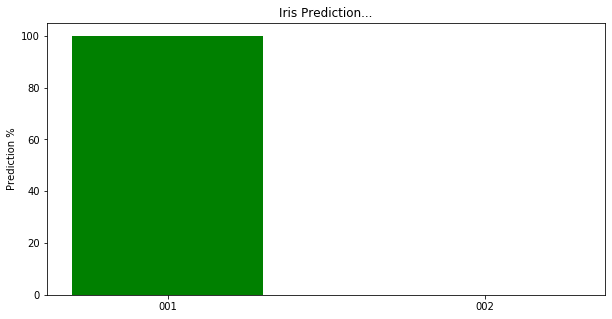

In [12]:
iris_recognition_pipeline.transform(confi_dict)